In [14]:
    #['0 intensitySum:' '1 intensityShare' '2 hairpixels' '3 imagepixels' '4 percentage'
    # '5 all pixels' '6 number of section' '7 number of section inclosed'
    # '8 outerSectionSum' '9 outerSectionPercentage' '10 innerSectionSum'
    # '11 innserSectionAvgSize' '12 innerSectionAvgSize Percentage'
    # '13 innerSectionSizeVariance' '14 std' '15 all pixels' '16 number of section'
    # '17 number of section inclosed' '18 outerSectionSum' '19 outerSectionPercentage'
    # '20 innerSectionSum' '21 innserSectionAvgSize' '22 innerSectionAvgSize Percentage'
    # '23 innerSectionSizeVariance' '24 std', 25 densehairSum, 26 loosehair sum]

In [132]:
import numpy as np
import matplotlib.pyplot as plt
#alldata = np.load('HairEstimationPython/Users/Bina/data/calibrationData.out' + '.npy')
#keys = np.load('HairEstimationPython/Users/Bina/data/calibkeyData.out' + '.npy')
#hairAmount = np.load('HairEstimationPython/Users/Bina/data/calibhairAmount.out' + '.npy')
alldata = np.load('HairEstimationPython/Users/Mummel/data/calibrationData.out' + '.npy')
keys = np.load('HairEstimationPython/Users/Mummel/data/calibkeyData.out' + '.npy')
hairAmount = np.load('HairEstimationPython/Users/Mummel/data/calibhairAmount.out' + '.npy')
denseinnerSectionSize = alldata[20::np.size(keys)]
denseSectionperc = alldata[19::np.size(keys)]
hairSectionSize = alldata[10::np.size(keys)]
outerSectionPerc = alldata[9::np.size(keys)]
origperc = alldata[4::np.size(keys)]
hairpixels = alldata[2::np.size(keys)]
hairAmount = np.array(list(map(int, hairAmount)))
secn = alldata[7::np.size(keys)]#number of inner sections
denseHairSum = alldata[25::np.size(keys)]
looseHairSum = alldata[26::np.size(keys)]
intensitySum = alldata[0::np.size(keys)]
intensityShare = alldata[1::np.size(keys)]
backgroundSectionNum = alldata[7::np.size(keys)]
denseSectionNum = alldata[17::np.size(keys)]
denseSectionAVGSize = alldata[21::np.size(keys)]
looseSectionAVGSize = alldata[11::np.size(keys)]
#denseHairSum = 2*denseHairSum
#looseHairSum = 1/2 * looseHairSum
allPixels = alldata[3::np.size(keys)]


hairPerc = ((looseHairSum+denseHairSum)/allPixels) * 100

innersec = 1- alldata[9::np.size(keys)]
denseSec = 1- alldata[19::np.size(keys)]

print(hairPerc)
print(hairAmount)

[ 3.54775332  2.24756785  2.94784421  4.42278142  4.81091986  5.81790627
  4.34414472  5.79387789  7.34644555  7.25422939  7.91494124 10.47373285]
[15 15 18 22 22 25 30 30 37 40 60 95]


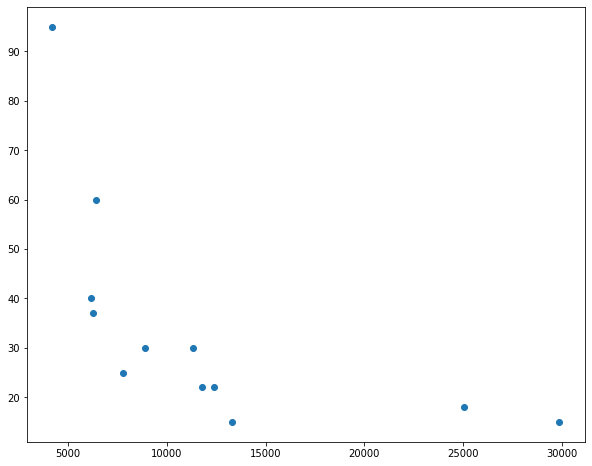

In [133]:
fig, ax = plt.subplots(figsize=(10, 8))
#ax.scatter(denseSectionAVGSize,hairAmount)
#ax.scatter(looseSectionAVGSize,hairAmount)
#ax.scatter(denseSectionAVGSize/(1-outersectionperc),hairAmount)
#ax.scatter((denseSectionAVGSize/looseSectionAVGSize)/(1-outersectionperc),hairAmount)
ax.scatter(denseSectionAVGSize/(1-denseSectionperc),hairAmount)

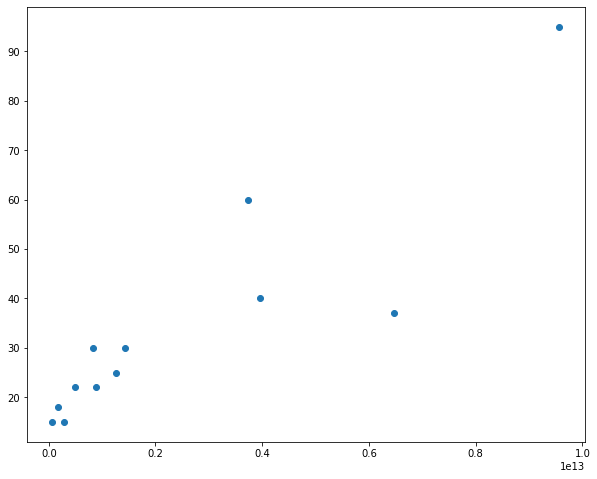

In [136]:
fig, ax = plt.subplots(figsize=(10, 8))
#ax.scatter(intensitySum,hairAmount)
#ax.scatter(intensityShare*(1-outersectionperc),hairAmount)
#ax.scatter(intensitySum*(1-outersectionperc),hairAmount)<

s = intensitySum*hairpixels*(1-outerSectionPerc)

ax.scatter(intensitySum*hairpixels*(1-outerSectionPerc),hairAmount)

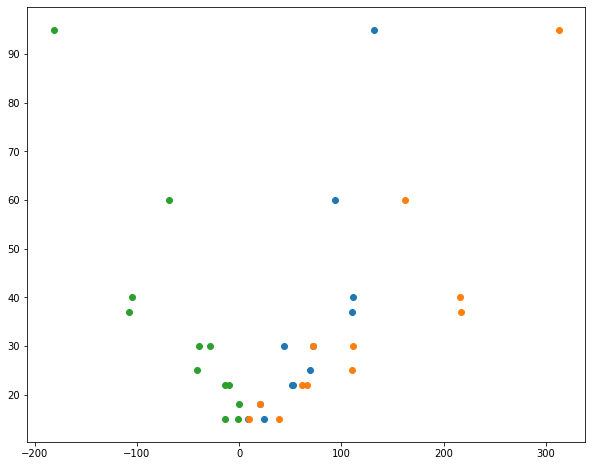

In [137]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(backgroundSectionNum*(1-outerSectionPerc),hairAmount)
ax.scatter(denseSectionNum*(1-outerSectionPerc),hairAmount)
ax.scatter((backgroundSectionNum-denseSectionNum)*(1-outerSectionPerc),hairAmount)

No handles with labels found to put in legend.


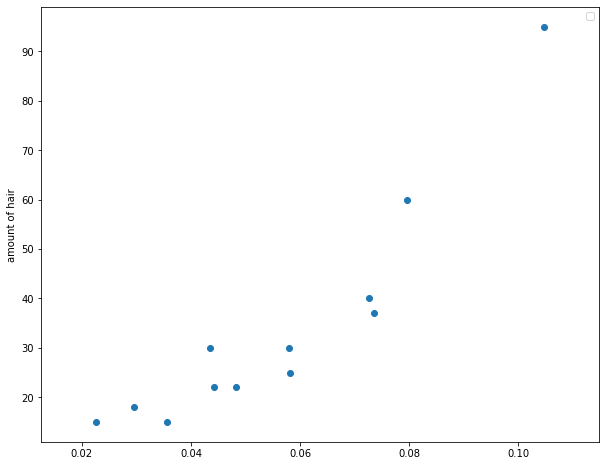

In [140]:
fig, ax = plt.subplots(figsize=(10, 8))
#ax.scatter(secn/(1-outersectionperc),hairAmount)#
#ax.scatter(denseHairSum/hairpixels,hairAmount)#anteil of hair that is in dense section
#ax.scatter(denseHairSum/denseinnerSectionSize,hairAmount)#density of hair in dense section
#ax.scatter(hairpixels/hairSectionSize,hairAmount)#dichte der haare
ax.scatter((hairpixels/hairSectionSize)*(1-outerSectionPerc),hairAmount)#dichte * haarsection size .this one is nice
#ax.scatter((hairpixels/hairSectionSize)*(1-outersectionperc)*hairperc,hairAmount)# this one's not bad either
#ax.scatter((((denseHairSum/denseinnerSectionSize)*(1-outersectionperc))),hairAmount)#anteil of hair that is in dense section
#ax.scatter((((denseHairSum/denseinnerSectionSize)*(1-denseSectionperc))),hairAmount)#density of dense section in realtion to section size
#ax.scatter(((hairpixels-denseHairSum)/(hairSectionSize-denseinnerSectionSize))*((1-outersectionperc)-(1-denseSectionperc)),hairAmount)



denseDensity = (((denseHairSum/denseinnerSectionSize)*(1-denseSectionperc)))
looseDensity = ((hairpixels-denseHairSum)/(hairSectionSize-denseinnerSectionSize))*((1-outerSectionPerc)-(1-denseSectionperc))
#ax.scatter(denseDensity/looseDensity,hairAmount)

ax.set_ylabel('amount of hair')
ax.legend(loc = 'best')
plt.show()

No handles with labels found to put in legend.


[0.07835863 0.04684654 0.08050605 0.10934626 0.11688727 0.12982964
 0.1095339  0.1571367  0.17028794 0.18907564 0.15921207 0.19214725]


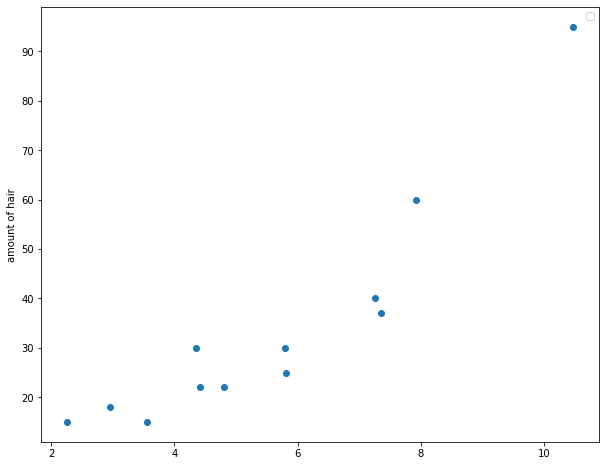

In [143]:
fig, ax = plt.subplots(figsize=(10, 8))
print(1-outerSectionPerc)
ax.scatter(hairPerc,hairAmount)#hair density. hairpixels/
ax.set_ylabel('amount of hair')
ax.legend(loc = 'best')
plt.show()

No handles with labels found to put in legend.


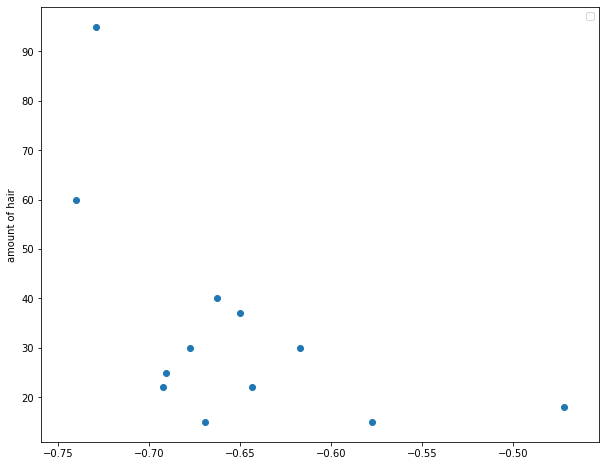

In [144]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter( denseSec-
denseHairSum/hairpixels,hairAmount)

ax.set_ylabel('amount of hair')
ax.legend(loc = 'best')
plt.show()

[0.05453527 0.04932245 0.05447209 0.13192199 0.24419202 0.07773051
 0.04219881 0.08798465 0.09095324 0.03607043 0.06129968 0.04990671
 0.05093446 0.09699017 0.06478101 0.02371391 0.06924445 0.07729965
 0.08935003 0.13322023]


ValueError: operands could not be broadcast together with shapes (12,) (20,) 

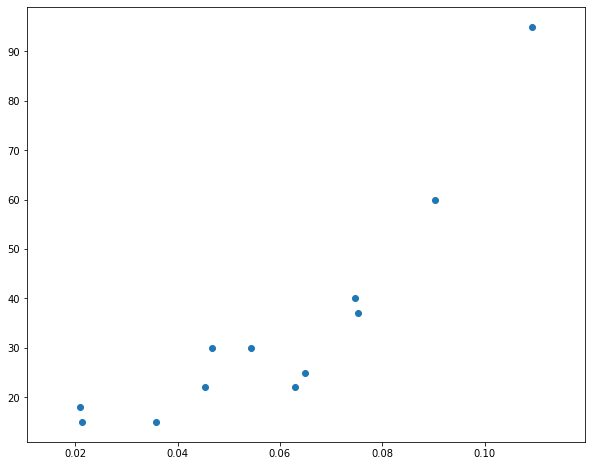

In [145]:
fig, ax = plt.subplots(figsize=(10, 8))
#ax.scatter(innersec,hairAmount,label='innersec')
print(1-outersectionperc)
ax.scatter(denseSec,hairAmount,label='denseSec')
ax.scatter(denseSec/(1-outersectionperc),hairAmount, label ='denseSec/(1-outersectionperc)')

ax.set_ylabel('amount of hair')
ax.legend(loc = 'best')
plt.show()

0.010729902078373798

No handles with labels found to put in legend.


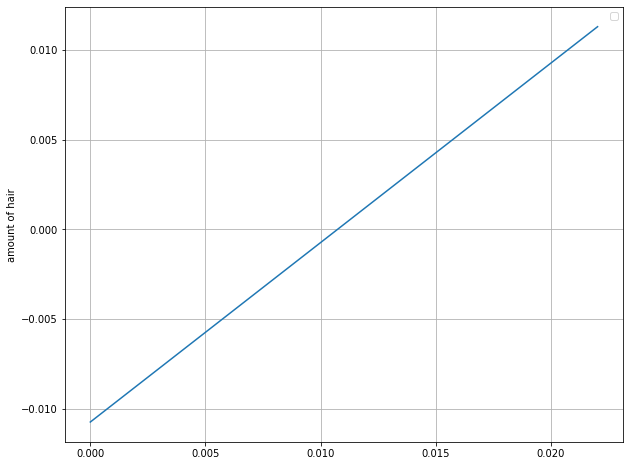

[(10, 0.018412079554187444), (10, 0.017863795236958024), (10, 0.018390483766430377), (120, 0.009190042653542396), (124, 0.014902997463937862), (18, 0.005261621171770536), (20, 0.009055151807811579), (20, 0.007672406823510336), (25, 0.008470719297888007), (3, 0.02202318952666671), (30, 0.0030965444627276684), (30, 0.009436162030577622), (30, 0.004742749853541284), (30, 0.014933842650974305), (40, 0.007813537425820027), (5, 0.014079401150740911), (50, 0.010208148698172437), (51, 0.005093277029793897), (55, 0.0066871004439638115), (70, 0.00726479051846074)]


In [79]:
fig, ax = plt.subplots(figsize=(10, 8))
x = np.linspace(0, diff.max(), 100)
m = diff.mean()

print(m)
ax.plot(x, x-m)
ax.grid()
ax.set_ylabel('amount of hair')
ax.legend(loc = 'best')
plt.show()
z = zip(hairAmount, diff)
print(list(z))

In [80]:
import numpy as np
import math
def PGPremoveOutlier(PData, Pp1, Pp2):
    # phase 1
    mu1 = PData.mean()
    sigma1 = math.sqrt(PData.var())  # std = standardabweichung (wie stats.binom.std()).
    k = 1 / math.sqrt(Pp1)
    odv1U = mu1 + k * sigma1
    odv1L = mu1 - k * sigma1
    # print('mu1 ',mu1, 'sigma: ',sigma1, 'k ', k, odv1U, odv1L)
    NewData = np.array([i for i in PData if i <= odv1U])
    NewData = np.array([i for i in NewData if i >= odv1L])

    # phase2
    mu2 = NewData.mean()
    sigma2 = math.sqrt(PData.var())
    k = 1 / math.sqrt(Pp2)
    odv2U = mu2 + k * sigma2
    odv2L = mu2 - k * sigma2
    NewData = np.array([i for i in NewData if i <= odv2U])
    NewData = np.array([i for i in NewData if i >= odv2L])

    return NewData

In [81]:
n = np.array([18.84759, 22.70800, 18.84759, 22.70800, 19.38002, 22.33196, 3.55758, 1.08649,
 99.02454 ,24.26115, 29.87332, 17.52103 ,10.73953, 30.00000, 32.48613, 29.12726])

In [82]:
m = PGPremoveOutlier(n, 1.5, 0.1)
print(m)
print(np.mean(m), np.median(m))

[18.84759 22.708   18.84759 22.708   19.38002 22.33196 24.26115 29.87332
 17.52103 10.73953 30.      32.48613 29.12726]
22.98704461538461 22.708


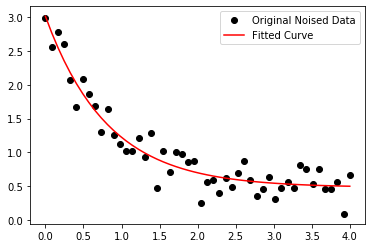

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def func(x, a, b, c):
    return a * np.exp(-b * x) + c

x = np.linspace(0,4,50)
y = func(x, 2.5, 1.3, 0.5)
yn = y + 0.2*np.random.normal(size=len(x))

popt, pcov = curve_fit(func, x, yn)

plt.figure()
plt.plot(x, yn, 'ko', label="Original Noised Data")
plt.plot(x, func(x, *popt), 'r-', label="Fitted Curve")
plt.legend()
plt.show()

In [253]:
def func(x, a, b, c,d):
    return a * np.exp(b * x) + c
    #print(b*x)
    #return a * (1 / x) + c
    #return a * np.log(abs(b) * x) + c
    #return a*1/x +b
    #return a*x +b

In [269]:
import math
x = denseSectionAVGSize/(1-denseSectionperc)
x = denseSectionAVGSize/(1-denseSectionperc)
x = (hairpixels/hairSectionSize)*(1-outerSectionPerc)*hairPerc
x = intensitySum*hairpixels*(1-outersectionperc)
y = hairAmount
inds = x.argsort()
x = x[inds]
y = y[inds]
#print(y)
popt, pcov = curve_fit(func, x, y)
print(popt)
plt.figure()
plt.plot(x, y, 'ko', label="Original Noised Data")
plt.plot(x, func(x, *popt), 'r-', label="Fitted Curve")
plt.legend()
plt.show()

ValueError: operands could not be broadcast together with shapes (12,) (20,) 

4.763248104115457e-49
found smaller
0.15940652710786465
0.016486038441916998
1.828722189040723e-164
found smaller
<function func_log at 0x14A72C90>


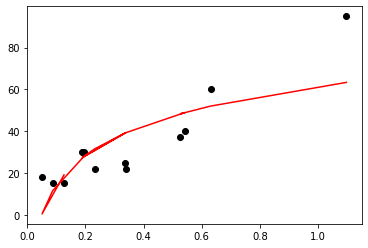

In [270]:
import scipy.stats
def func_exp(x, a, b, c):
    return a * np.exp(b * x) + c
def func_divx(x, a, b):
    return a * (1 / x) + b
def func_log(x, a, b, c):
    return a * np.log(abs(b) * x) + c
def func_lin(x,a,b):
    return a * x + b
def findBestFunction(x, y):
    func = func_exp
    possiblefunc = np.array([func_divx,func_exp,func_lin,func_log])
    minChisq = 5000
    bestFunc = func_lin
    for func in possiblefunc:
        try:
            popt, pcov = curve_fit(func, x, y)
        except:
            continue
        #plt.plot(x, y, 'ko', label="Original Noised Data")
        #plt.plot(x, func(x, *popt), 'r-', label="Fitted Curve")
        _,chisq = scipy.stats.chisquare(y, func(x, *popt), ddof = 2,axis = 0)
        print(chisq)
        if np.isnan(chisq):
            continue
        if chisq < minChisq:
            print('found smaller')
            minChisq = chisq
            bestFunc = func
    return bestFunc
func = findBestFunction(x,y)
print(func)
popt, pcov = curve_fit(func, x, y)
plt.plot(x, y, 'ko', label="Original Noised Data")
plt.plot(x, func(x, *popt), 'r-', label="Fitted Curve")
plt.show()

No handles with labels found to put in legend.


[0.05453527 0.04932245 0.05447209 0.13192199 0.24419202 0.07773051
 0.04219881 0.08798465 0.09095324 0.03607043 0.06129968 0.04990671
 0.05093446 0.09699017 0.06478101 0.02371391 0.06924445 0.07729965
 0.08935003 0.13322023]


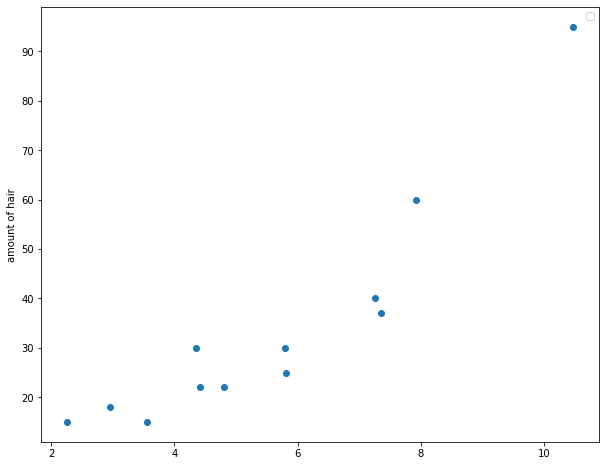

In [271]:
import numpy
fig, ax = plt.subplots(figsize=(10, 8))
print(1-outersectionperc)
ax.scatter(hairPerc,hairAmount)#hair density. hairpixels/
ax.set_ylabel('amount of hair')
ax.legend(loc = 'best')

numpy.polyfit(numpy.log(x), y, 1)

plt.show()
x = hairperc
y = hairAmount

In [115]:
str = 'exp_exp_log_lin_divx'
def setFunctions(str):
    data = str.split("_")
    print(data)
setFunctions(str)

['exp', 'exp', 'log', 'lin', 'divx']
